# Reverse Geocoding using the open source OSMnx library to obtain road attributes

## Author: Sam Taimourzadeh
### Email: sam.taimourzadeh@toyota-ims.com

#### In this notebook, we will create a database of road attributes as functions of longitude and lattitude positions. This study will use Salt Lake City (SLC) as a test location.

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
place_name = 'Salt Lake City, Utah'

#### The following is a system of nodes and edges. Nodes are locations recorded in the open source OpenStreetMaps, and edges are the roadway connections between nodes. 

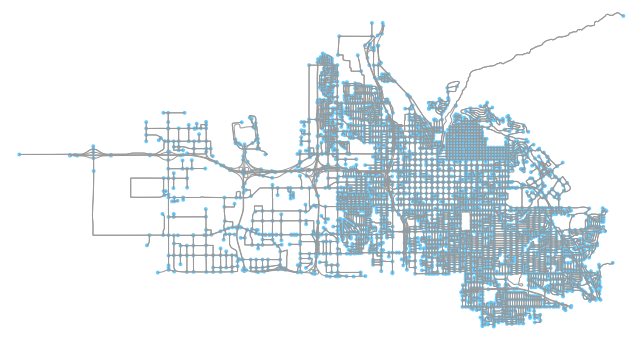

In [3]:
graph = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(graph)

In [ ]:
# Store edge dataFrame and save to database csv file
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
edges.to_csv('/Users/samtaimourzadeh/Downloads/edges_test.csv')

In [9]:
edges.head()

,Unnamed: 0,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v
0,0,NaN,NaN,"LINESTRING (-111.8389197 40.708906, -111.83891...",residential,NaN,0,NaN,42.499,25 mph,Melbourne Street,False,10149523,NaN,NaN,NaN,2937569283,83694460
1,1,NaN,NaN,"LINESTRING (-111.8389197 40.708906, -111.83917...",residential,NaN,0,NaN,79.588,25 mph,Melbourne Street,False,10149523,NaN,NaN,NaN,2937569283,83591592
2,2,NaN,NaN,"LINESTRING (-111.8389197 40.708906, -111.83888...",residential,NaN,0,NaN,77.156,NaN,NaN,False,321407916,NaN,NaN,NaN,2937569283,3281566893
3,3,NaN,NaN,"LINESTRING (-111.9258576 40.7368384, -111.9258...",residential,NaN,0,NaN,37.955,NaN,1200 West,False,10148837,NaN,NaN,NaN,83705866,83545910
4,4,NaN,NaN,"LINESTRING (-111.9258576 40.7368384, -111.9268...",residential,NaN,0,NaN,86.968,NaN,Andrew Avenue,False,10150211,NaN,NaN,NaN,83705866,83704070


#### Now we can define an arbitratry location in SLC and obtain the corresponding road attributes. For reference, we will plot a small subset of our map, centered about our location.

In [8]:
location = (40.758220, -111.899599)

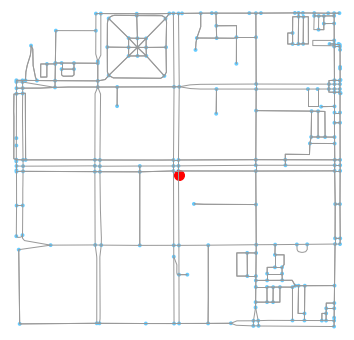

#### Next we load the SLT database we previously stored, and convert the stored edge geolocations of SLT from string datatype to pandas dataFrames (not optimized, work in progress...)

In [4]:
edges = pd.read_csv('/Users/samtaimourzadeh/Downloads/edges_test.csv')

In [5]:
# number of edges
nedges = edges.geometry.size

In [6]:
# get longitude/latitude dataFrame for edges

df_edge_loc = pd.DataFrame()
for i in range(0, nedges):
    edge_string = edges['geometry'][i][12:-1].split(",")
    tmp = []
    for j in range(0, len(edge_string)):
        edge_array = np.fromstring(edge_string[j], sep=' ')
        edge_array = np.flip(edge_array)
        tmp.append(edge_array)
        tmp2 = np.concatenate(tmp)
        dftmp = pd.DataFrame(tmp2)
    df_edge_loc = pd.concat([df_edge_loc, dftmp], axis=1, ignore_index=True)

#### Now we find the closest point from the data base to the test point by minimizing the sum of the differences of test longitude to data base longitude and test latitude and data base latitude. i.e. $Min(|lat_{data} - lat_{test}| + |long_{data} - long_{test}|)$

In [9]:
df_error = (abs(df_edge_loc[1::2] - location[1]).reset_index(drop=True) + abs(df_edge_loc[0::2] - location[0]).reset_index(drop=True)).min() 

In [10]:
# get column index of nearest edge
index = df_error.idxmin()

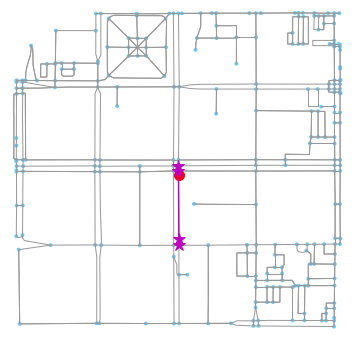

In [11]:
# Plot results

tmp = np.array(df_edge_loc.iloc[:,index].dropna())
ytmp = tmp[::2]
xtmp = tmp[1::2]

graph = ox.graph_from_point(location, distance=500)
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.scatter(location[1],location[0], c = 'r', s = 100)
plt.plot(xtmp,ytmp, '-*m', markersize=13)
plt.show()

In [12]:
index

6722